# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [58]:
from commonfunctions import *
import math
import skimage
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''
from skimage.filters import roberts, sobel, prewitt
from skimage import feature

[[ 15  15  15 ... 148 144 142]
 [ 16  14  14 ... 135 144 151]
 [ 16  16  14 ... 134 141 152]
 ...
 [ 36  59  78 ...  87  76  61]
 [ 31  45  53 ...  88  76  63]
 [ 27  39  47 ...  87  74  62]]


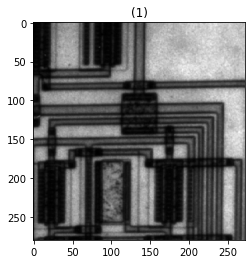

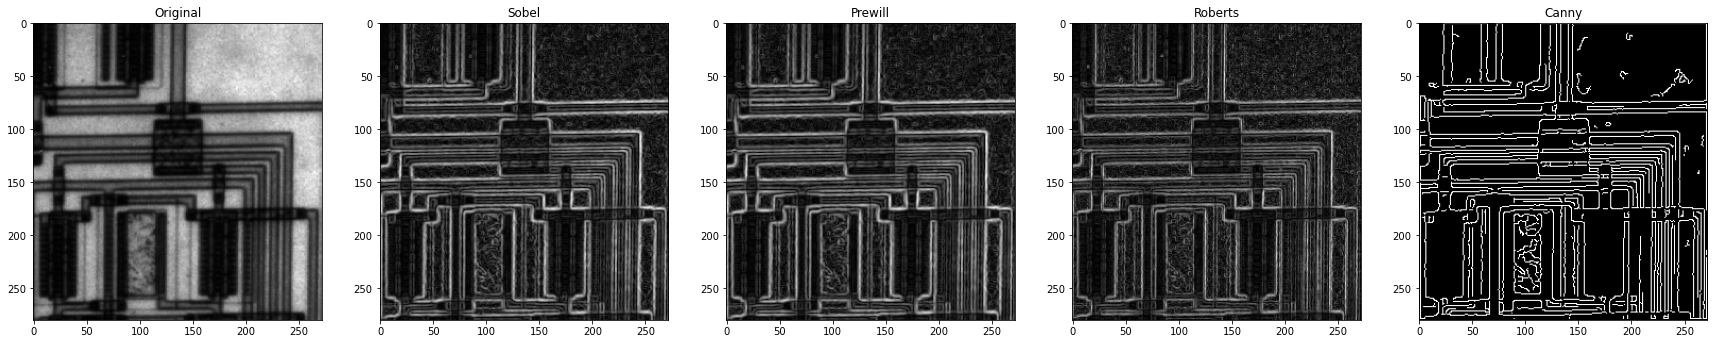

In [60]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

img = io.imread('./circuit.tif')
print(img)
show_images([img])
edge_sobel = sobel(img)
edges_prewitt = prewitt(img)
edge_roberts = roberts(img)
edge_canny = feature.canny(img)
show_images([img,edge_sobel,edges_prewitt,edge_roberts,edge_canny],["Original","Sobel","Prewill","Roberts","Canny"])

In [61]:
# 2. Custom Sobel (V-H-Both)
def Sobel(image):
    hx = np.array([
        [-1,-2,-1],
        [0,0,0],
        [1,2,1],
    ]) 
    hy = np.array([
        [-1,0,1],
        [-2,0,2],
        [-1,0,1],
    ]) 
    edgex = 1
    edgey = 1
    # gx = np.zeros((image.shape[0],image.shape[1]))
    # gy = np.zeros((image.shape[0],image.shape[1]))
    # for x in range(edgex, image.shape[0] - edgex - 1):
    #     for y in range(edgey, image.shape[1] - edgey - 1):
    gx = convolve2d(image,hx)
    gy = convolve2d(image,hy)    
    outimage = np.sqrt(gx**2+gy**2)
    show_images([image,gx,gy,outimage],['Original','X filter','Y filter','X and Y filter'])
    return

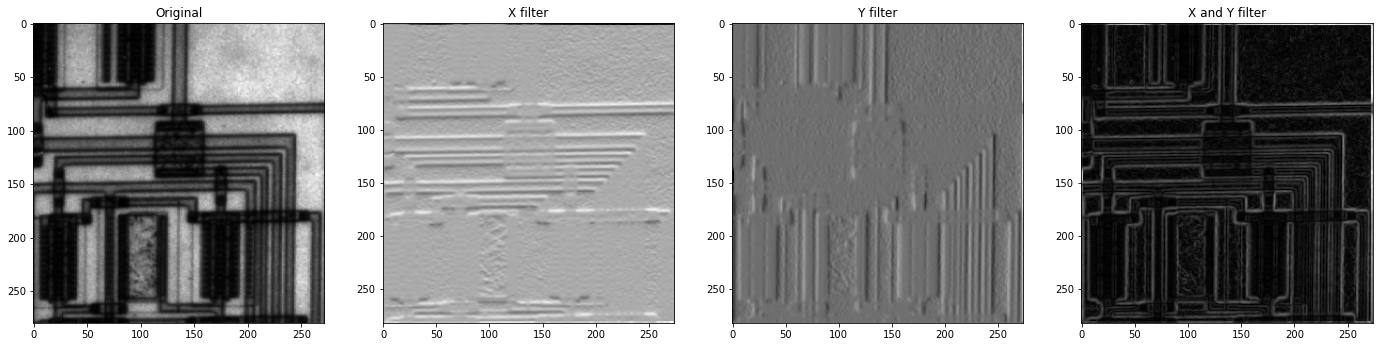

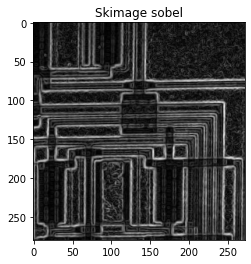

In [62]:
Sobel(img)
show_images([edge_sobel],['Skimage sobel'])

In [67]:
# 3. Custom LoG
from skimage.filters import gaussian
thres = 20
def LoG_F1(image,threshold):
    filtered_image = gaussian(image)
    F1 = np.array([
        [-1,-1,-1],
        [-1,8,-1],
        [-1,-1,-1]
    ]) 
    out_image = convolve2d(filtered_image,F1)
    out_image = out_image > threshold
    return out_image

    
def LoG_F2(image,threshold):
    filtered_image = gaussian(image)
    F2 = np.array([
        [0,1,0],
        [1,-4,1],
        [0,1,0]
    ]) 
    out_image = convolve2d(filtered_image,F2)
    out_image = out_image > threshold
    return out_image


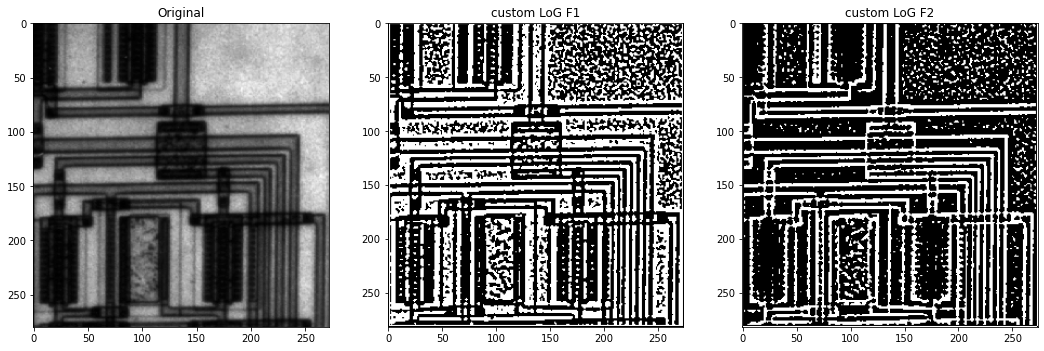

In [68]:
F1 = LoG_F1(img,0.01)
F2 = LoG_F2(img,0.01)
show_images([img,F1,F2],['Original','custom LoG F1','custom LoG F2'])

In [ ]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'